In [1]:
import pandas as pd


/tmp/ipykernel_8345/2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

with open("response_output.json") as f:
    json_data = pd.read_json(f, orient='records')

print(json_data)

          Company ID        Name         CEO Name  \
0   Yo1b4BEAACoAzVvo  Epic Games      Tim Sweeney   
1   ZbAd4RIAACgA-N2s     Kapital        René Saul   
2   ZbAd4RIAACgA-N2s     Kapital        René Saul   
3   ZbAd4RIAACgA-N2s     Kapital        René Saul   
4   ZXEB7hMAACoAIwfp       Order  Zachary Garippa   
..               ...         ...              ...   
63  ZMvbGBEAACkAgKWR      Litmus      Vatsal Shah   
64  ZMvbGBEAACkAgKWR      Litmus      Vatsal Shah   
65  Yo1bOhEAAC0AzVjp     Anduril    Brian Schimpf   
66  YpppshEAAC4ABrTx      SpaceX        Elon Musk   
67  YST3oREAACAAOU14        Ramp      Eric Glyman   

                         Business Type         City     State        Country  \
0                             [gaming]         Cary        NC  United States   
1   [b2b, neobank, expense management]  Mexico City      None         Mexico   
2   [b2b, neobank, expense management]  Mexico City      None         Mexico   
3   [b2b, neobank, expense management]  Mex

In [3]:
df = pd.DataFrame(json_data)

df.columns

Index(['Company ID', 'Name', 'CEO Name', 'Business Type', 'City', 'State',
       'Country', 'Description', 'Valuation Date', 'Revenue Date',
       'Growth Rate Date', 'Valuation', 'Revenue', 'Growth'],
      dtype='object')

In [4]:
new_df = df.rename(columns={
    'Company ID':'ID',
    "Business Type": "Type",
})


In [5]:
print(new_df.columns)

Index(['ID', 'Name', 'CEO Name', 'Type', 'City', 'State', 'Country',
       'Description', 'Valuation Date', 'Revenue Date', 'Growth Rate Date',
       'Valuation', 'Revenue', 'Growth'],
      dtype='object')


In [6]:
print(new_df)

                  ID        Name         CEO Name  \
0   Yo1b4BEAACoAzVvo  Epic Games      Tim Sweeney   
1   ZbAd4RIAACgA-N2s     Kapital        René Saul   
2   ZbAd4RIAACgA-N2s     Kapital        René Saul   
3   ZbAd4RIAACgA-N2s     Kapital        René Saul   
4   ZXEB7hMAACoAIwfp       Order  Zachary Garippa   
..               ...         ...              ...   
63  ZMvbGBEAACkAgKWR      Litmus      Vatsal Shah   
64  ZMvbGBEAACkAgKWR      Litmus      Vatsal Shah   
65  Yo1bOhEAAC0AzVjp     Anduril    Brian Schimpf   
66  YpppshEAAC4ABrTx      SpaceX        Elon Musk   
67  YST3oREAACAAOU14        Ramp      Eric Glyman   

                                  Type         City     State        Country  \
0                             [gaming]         Cary        NC  United States   
1   [b2b, neobank, expense management]  Mexico City      None         Mexico   
2   [b2b, neobank, expense management]  Mexico City      None         Mexico   
3   [b2b, neobank, expense management]  Mex

In [7]:
duplicates = new_df[new_df.duplicated(subset=['ID'], keep=False)]

print(duplicates)


                  ID         Name                              CEO Name  \
0   Yo1b4BEAACoAzVvo   Epic Games                           Tim Sweeney   
1   ZbAd4RIAACgA-N2s      Kapital                             René Saul   
2   ZbAd4RIAACgA-N2s      Kapital                             René Saul   
3   ZbAd4RIAACgA-N2s      Kapital                             René Saul   
5   ZUU1DxUAAC4A0eZ8       Apollo                             Tim Zheng   
7   YST3oREAACAAOU14         Ramp                           Eric Glyman   
8   YST2_REAACIAOUpk         Brex  Henrique Dubugras & Pedro Franceschi   
9   YST3oREAACAAOU14         Ramp                           Eric Glyman   
10  YST2_REAACIAOUpk         Brex  Henrique Dubugras & Pedro Franceschi   
12  YVywbhEAACIAg5PL        Figma                           Dylan Field   
13  ZMvbGBEAACkAgKWR       Litmus                           Vatsal Shah   
14  YKezbRMAACAABbEy  Customer.io                      Colin Nederkoorn   
22  YVywbhEAACIAg5PL     

In [8]:
new_df = new_df.drop_duplicates(subset=['ID'], keep='first')

print(new_df)

                  ID          Name                              CEO Name  \
0   Yo1b4BEAACoAzVvo    Epic Games                           Tim Sweeney   
1   ZbAd4RIAACgA-N2s       Kapital                             René Saul   
4   ZXEB7hMAACoAIwfp         Order                       Zachary Garippa   
5   ZUU1DxUAAC4A0eZ8        Apollo                             Tim Zheng   
6   YOhtmxAAACEA2Dh_         Carta                            Henry Ward   
7   YST3oREAACAAOU14          Ramp                           Eric Glyman   
8   YST2_REAACIAOUpk          Brex  Henrique Dubugras & Pedro Franceschi   
11  YKfIZhMAACIABgm7        Zapier                           Wade Foster   
12  YVywbhEAACIAg5PL         Figma                           Dylan Field   
13  ZMvbGBEAACkAgKWR        Litmus                           Vatsal Shah   
14  YKezbRMAACAABbEy   Customer.io                      Colin Nederkoorn   
15  ZYG-khIAAC0A0ag0      SimSpace                     William Hutchison   
16  ZP9beBEA

In [9]:
if new_df.isnull().values.any():
    print("There are empty cells in the DataFrame.")
else:
    print("There are no empty cells in the DataFrame.")


There are empty cells in the DataFrame.


In [10]:
if new_df.isnull().any(axis=1).any():
    print("There are rows with at least one empty cell.")
else:
    print("All rows have no empty cells.")


There are rows with at least one empty cell.


In [11]:
new_df.columns

Index(['ID', 'Name', 'CEO Name', 'Type', 'City', 'State', 'Country',
       'Description', 'Valuation Date', 'Revenue Date', 'Growth Rate Date',
       'Valuation', 'Revenue', 'Growth'],
      dtype='object')

In [12]:
country_df = new_df[new_df['Country'] == "Mexico"]
print("Df\n",country_df)

Df
                  ID     Name   CEO Name                                Type  \
1  ZbAd4RIAACgA-N2s  Kapital  René Saul  [b2b, neobank, expense management]   

          City State Country  \
1  Mexico City  None  Mexico   

                                         Description Valuation Date  \
1  Kapital is a digitally-native neobank for SMBs...           None   

  Revenue Date Growth Rate Date  Valuation     Revenue  Growth  
1   2024-01-24       2024-01-24        NaN  72000000.0   755.0  


In [13]:
if (new_df == 0).any().any():
    print("There are cells with a value of 0 in the DataFrame.")
else:
    print("There are no cells with a value of 0 in the DataFrame.")


There are cells with a value of 0 in the DataFrame.


In [14]:
zero_df=(new_df == 0).any().any()
print(zero_df)


True


In [15]:
rows_with_zeros = new_df[(new_df == 0).any(axis=1)]
print("Rows with zeros:\n",rows_with_zeros)


Rows with zeros:
                  ID        Name     CEO Name      Type  City State  \
0  Yo1b4BEAACoAzVvo  Epic Games  Tim Sweeney  [gaming]  Cary    NC   

         Country                                        Description  \
0  United States  Epic Games is a vertically integrated game dev...   

  Valuation Date Revenue Date Growth Rate Date     Valuation       Revenue  \
0     2023-10-29   2023-10-29       2023-10-29  3.200000e+10  5.200000e+09   

   Growth  
0     0.0  


In [16]:

zero_columns = new_df.columns[new_df.isin([0]).any()].tolist()
print("Columns with zeros:",zero_columns)


Columns with zeros: ['Growth']


In [17]:
column_data_types = new_df.dtypes
print("Data types of columns:\n ",column_data_types)


Data types of columns:
  ID                   object
Name                 object
CEO Name             object
Type                 object
City                 object
State                object
Country              object
Description          object
Valuation Date       object
Revenue Date         object
Growth Rate Date     object
Valuation           float64
Revenue             float64
Growth              float64
dtype: object


In [18]:
print(new_df[['Valuation', 'Revenue', 'Growth']]) 


       Valuation       Revenue  Growth
0   3.200000e+10  5.200000e+09     0.0
1            NaN  7.200000e+07   755.0
4            NaN           NaN     NaN
5   1.600000e+09  9.600000e+07   100.0
6            NaN           NaN     NaN
7   5.500000e+09  2.950000e+08   136.0
8   1.230000e+10  3.180000e+08    48.0
11  7.000000e+09  1.800000e+08    50.0
12  2.000000e+10  6.000000e+08    50.0
13           NaN  4.500000e+07    20.0
14           NaN  5.800000e+07    35.0
15           NaN  5.000000e+07     NaN
16  2.300000e+09  1.350000e+08    42.0
17  4.000000e+09  9.000000e+08    80.0
18  1.800000e+09  1.800000e+08    50.0
19  3.000000e+11  1.080000e+11    27.0
20           NaN  1.000000e+07   900.0
21  6.600000e+10  3.300000e+10    43.0
23  1.200000e+10  4.000000e+08    36.0
24  8.480000e+09  6.250000e+08   165.0
25           NaN           NaN     NaN
28  1.500000e+11  6.000000e+09    30.0
29           NaN           NaN     NaN
30           NaN           NaN     NaN
31           NaN         

In [19]:
new_df[['Valuation', 'Revenue', 'Growth']] = new_df[['Valuation', 'Revenue', 'Growth']].fillna(0)


In [20]:
print(new_df[['Valuation', 'Revenue', 'Growth']]) 


       Valuation       Revenue  Growth
0   3.200000e+10  5.200000e+09     0.0
1   0.000000e+00  7.200000e+07   755.0
4   0.000000e+00  0.000000e+00     0.0
5   1.600000e+09  9.600000e+07   100.0
6   0.000000e+00  0.000000e+00     0.0
7   5.500000e+09  2.950000e+08   136.0
8   1.230000e+10  3.180000e+08    48.0
11  7.000000e+09  1.800000e+08    50.0
12  2.000000e+10  6.000000e+08    50.0
13  0.000000e+00  4.500000e+07    20.0
14  0.000000e+00  5.800000e+07    35.0
15  0.000000e+00  5.000000e+07     0.0
16  2.300000e+09  1.350000e+08    42.0
17  4.000000e+09  9.000000e+08    80.0
18  1.800000e+09  1.800000e+08    50.0
19  3.000000e+11  1.080000e+11    27.0
20  0.000000e+00  1.000000e+07   900.0
21  6.600000e+10  3.300000e+10    43.0
23  1.200000e+10  4.000000e+08    36.0
24  8.480000e+09  6.250000e+08   165.0
25  0.000000e+00  0.000000e+00     0.0
28  1.500000e+11  6.000000e+09    30.0
29  0.000000e+00  0.000000e+00     0.0
30  0.000000e+00  0.000000e+00     0.0
31  0.000000e+00  0.00000

In [21]:
new_df[['Valuation', 'Revenue']] = new_df[['Valuation', 'Revenue']].astype(int)

print(new_df)

                  ID          Name                              CEO Name  \
0   Yo1b4BEAACoAzVvo    Epic Games                           Tim Sweeney   
1   ZbAd4RIAACgA-N2s       Kapital                             René Saul   
4   ZXEB7hMAACoAIwfp         Order                       Zachary Garippa   
5   ZUU1DxUAAC4A0eZ8        Apollo                             Tim Zheng   
6   YOhtmxAAACEA2Dh_         Carta                            Henry Ward   
7   YST3oREAACAAOU14          Ramp                           Eric Glyman   
8   YST2_REAACIAOUpk          Brex  Henrique Dubugras & Pedro Franceschi   
11  YKfIZhMAACIABgm7        Zapier                           Wade Foster   
12  YVywbhEAACIAg5PL         Figma                           Dylan Field   
13  ZMvbGBEAACkAgKWR        Litmus                           Vatsal Shah   
14  YKezbRMAACAABbEy   Customer.io                      Colin Nederkoorn   
15  ZYG-khIAAC0A0ag0      SimSpace                     William Hutchison   
16  ZP9beBEA

In [22]:
new_df['Growth'] = new_df['Growth'].astype(float) 

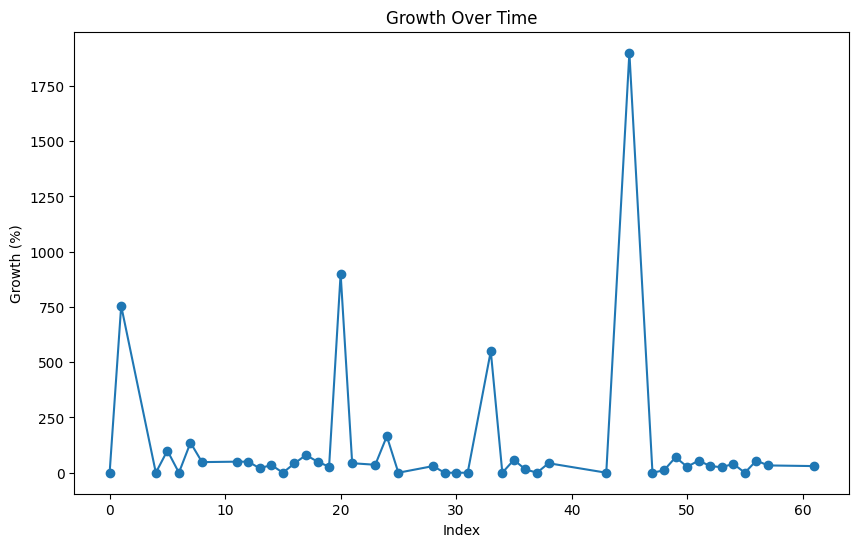

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(new_df['Growth'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Growth (%)')
plt.title('Growth Over Time')
plt.show()


In [24]:
new_df

,ID,Name,CEO Name,Type,City,State,Country,Description,Valuation Date,Revenue Date,Growth Rate Date,Valuation,Revenue,Growth
0,Yo1b4BEAACoAzVvo,Epic Games,Tim Sweeney,[gaming],Cary,NC,United States,Epic Games is a vertically integrated game dev...,2023-10-29,2023-10-29,2023-10-29,32000000000,5200000000,0.0
1,ZbAd4RIAACgA-N2s,Kapital,René Saul,"[b2b, neobank, expense management]",Mexico City,None,Mexico,Kapital is a digitally-native neobank for SMBs...,None,2024-01-24,2024-01-24,0,72000000,755.0
4,ZXEB7hMAACoAIwfp,Order,Zachary Garippa,[vertical saas],New York,NY,United States,Order is a vertical SaaS for B2B procurement.,None,None,None,0,0,0.0
5,ZUU1DxUAAC4A0eZ8,Apollo,Tim Zheng,"[b2b, sales]",San Francisco,CA,United States,Apollo is a sales intelligence and engagement ...,2023-11-03,2023-11-03,2023-11-03,1600000000,96000000,100.0
6,YOhtmxAAACEA2Dh_,Carta,Henry Ward,"[b2b, fintech, private markets exchanges, cap ...",San Francisco,CA,None,Carta helps companies and investors manage the...,None,None,None,0,0,0.0
7,YST3oREAACAAOU14,Ramp,Eric Glyman,"[b2b, fintech, expense management]",New York,New York,United States,Ramp is a corporate card and expense managemen...,2022-12-01,2023-12-01,2023-12-01,5500000000,295000000,136.0
8,YST2_REAACIAOUpk,Brex,Henrique Dubugras & Pedro Franceschi,"[b2b, fintech, expense management]",San Francisco,California,United States,Brex is a corporate card and expense managemen...,2023-12-01,2023-12-01,2023-12-01,12300000000,318000000,48.0
11,YKfIZhMAACIABgm7,Zapier,Wade Foster,"[productivity, automation]",San Francisco,CA,United States,Zapier is a no-code platform for connecting ap...,2022-12-01,2022-12-01,2022-12-01,7000000000,180000000,50.0
12,YVywbhEAACIAg5PL,Figma,Dylan Field,"[b2b, design, online whiteboard]",San Francisco,CA,United States,"Figma is a collaborative, web-based vector des...",2022-01-01,2023-12-19,2023-12-19,20000000000,600000000,50.0
13,ZMvbGBEAACkAgKWR,Litmus,Vatsal Shah,"[b2b, marketing automation]",Boston,MA,United States,Litmus is an email marketing platform that hel...,None,2022-09-15,2022-09-15,0,45000000,20.0


In [25]:
filtered_df = new_df[(new_df != 0).all(axis=1)]
filtered_df

,ID,Name,CEO Name,Type,City,State,Country,Description,Valuation Date,Revenue Date,Growth Rate Date,Valuation,Revenue,Growth
5,ZUU1DxUAAC4A0eZ8,Apollo,Tim Zheng,"[b2b, sales]",San Francisco,CA,United States,Apollo is a sales intelligence and engagement ...,2023-11-03,2023-11-03,2023-11-03,1600000000,96000000,100.0
7,YST3oREAACAAOU14,Ramp,Eric Glyman,"[b2b, fintech, expense management]",New York,New York,United States,Ramp is a corporate card and expense managemen...,2022-12-01,2023-12-01,2023-12-01,5500000000,295000000,136.0
8,YST2_REAACIAOUpk,Brex,Henrique Dubugras & Pedro Franceschi,"[b2b, fintech, expense management]",San Francisco,California,United States,Brex is a corporate card and expense managemen...,2023-12-01,2023-12-01,2023-12-01,12300000000,318000000,48.0
11,YKfIZhMAACIABgm7,Zapier,Wade Foster,"[productivity, automation]",San Francisco,CA,United States,Zapier is a no-code platform for connecting ap...,2022-12-01,2022-12-01,2022-12-01,7000000000,180000000,50.0
12,YVywbhEAACIAg5PL,Figma,Dylan Field,"[b2b, design, online whiteboard]",San Francisco,CA,United States,"Figma is a collaborative, web-based vector des...",2022-01-01,2023-12-19,2023-12-19,20000000000,600000000,50.0
16,ZP9beBEAACkAjddx,Shield AI,Ryan Tseng,[defense],San Diego,CA,United States,Shield AI is an American aerospace and defense...,2023-09-11,2023-09-11,2023-09-11,2300000000,135000000,42.0
17,Yo1dhREAACwAzWOC,Rubrik,Bipul Sinha,"[data security, b2b, cybersecurity]",Palo Alto,CA,United States,"Rubrik is a data backup, management, and secur...",2021-06-24,2023-12-19,2023-12-19,4000000000,900000000,80.0
18,ZYGylhIAACgAmGrX,Kindbody,Gina Bartasi,[telehealth],New York,NY,United States,Kindbody is a employee benefit for fertility a...,2023-12-19,2023-12-19,2023-12-19,1800000000,180000000,50.0
19,YpAo3BEAACwA2Z6U,ByteDance,Liang Rubo,"[b2c, social media]",Beijing,None,CN,ByteDance is an internet technology business b...,2022-05-26,2023-05-26,2023-05-26,300000000000,108000000000,27.0
21,YtlCXxIAACwAuW1I,Shein,Chris Xu,"[ecommerce, b2c]",Singapore,CA,United States,Shein is a Chinese online fast-fashion ecommer...,2023-12-19,2023-12-19,2023-12-19,66000000000,33000000000,43.0


In [26]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,ID,Name,CEO Name,Type,City,State,Country,Description,Valuation Date,Revenue Date,Growth Rate Date,Valuation,Revenue,Growth
0,ZUU1DxUAAC4A0eZ8,Apollo,Tim Zheng,"[b2b, sales]",San Francisco,CA,United States,Apollo is a sales intelligence and engagement ...,2023-11-03,2023-11-03,2023-11-03,1600000000,96000000,100.0
1,YST3oREAACAAOU14,Ramp,Eric Glyman,"[b2b, fintech, expense management]",New York,New York,United States,Ramp is a corporate card and expense managemen...,2022-12-01,2023-12-01,2023-12-01,5500000000,295000000,136.0
2,YST2_REAACIAOUpk,Brex,Henrique Dubugras & Pedro Franceschi,"[b2b, fintech, expense management]",San Francisco,California,United States,Brex is a corporate card and expense managemen...,2023-12-01,2023-12-01,2023-12-01,12300000000,318000000,48.0
3,YKfIZhMAACIABgm7,Zapier,Wade Foster,"[productivity, automation]",San Francisco,CA,United States,Zapier is a no-code platform for connecting ap...,2022-12-01,2022-12-01,2022-12-01,7000000000,180000000,50.0
4,YVywbhEAACIAg5PL,Figma,Dylan Field,"[b2b, design, online whiteboard]",San Francisco,CA,United States,"Figma is a collaborative, web-based vector des...",2022-01-01,2023-12-19,2023-12-19,20000000000,600000000,50.0
5,ZP9beBEAACkAjddx,Shield AI,Ryan Tseng,[defense],San Diego,CA,United States,Shield AI is an American aerospace and defense...,2023-09-11,2023-09-11,2023-09-11,2300000000,135000000,42.0
6,Yo1dhREAACwAzWOC,Rubrik,Bipul Sinha,"[data security, b2b, cybersecurity]",Palo Alto,CA,United States,"Rubrik is a data backup, management, and secur...",2021-06-24,2023-12-19,2023-12-19,4000000000,900000000,80.0
7,ZYGylhIAACgAmGrX,Kindbody,Gina Bartasi,[telehealth],New York,NY,United States,Kindbody is a employee benefit for fertility a...,2023-12-19,2023-12-19,2023-12-19,1800000000,180000000,50.0
8,YpAo3BEAACwA2Z6U,ByteDance,Liang Rubo,"[b2c, social media]",Beijing,None,CN,ByteDance is an internet technology business b...,2022-05-26,2023-05-26,2023-05-26,300000000000,108000000000,27.0
9,YtlCXxIAACwAuW1I,Shein,Chris Xu,"[ecommerce, b2c]",Singapore,CA,United States,Shein is a Chinese online fast-fashion ecommer...,2023-12-19,2023-12-19,2023-12-19,66000000000,33000000000,43.0


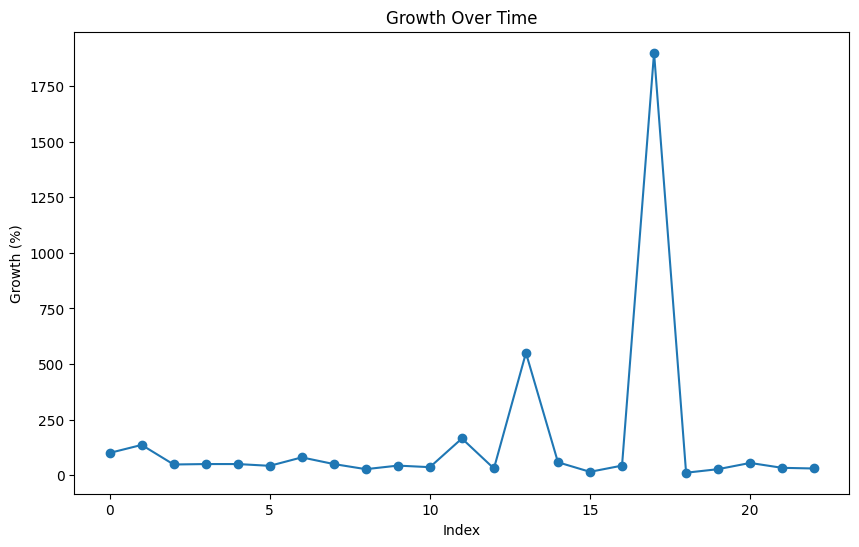

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Growth'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Growth (%)')
plt.title('Growth Over Time')
plt.show()


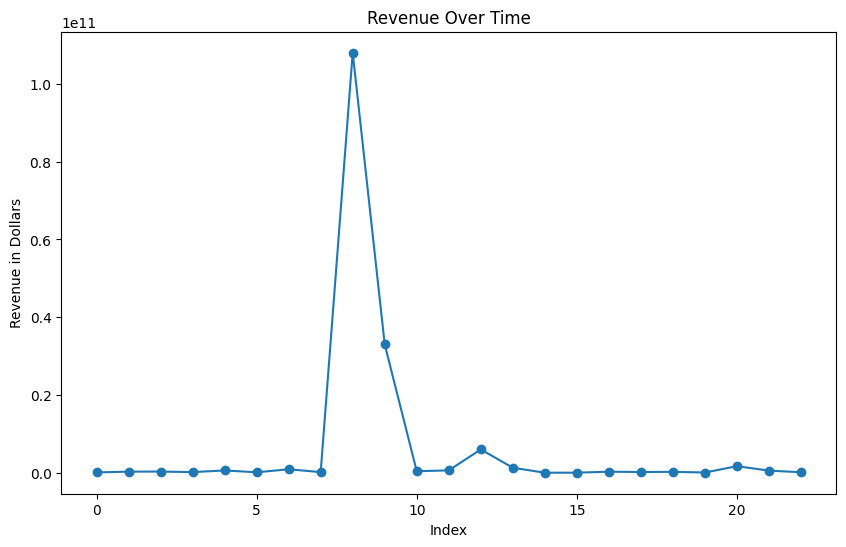

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Revenue'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Revenue in Dollars')
plt.title('Revenue Over Time')
plt.show()


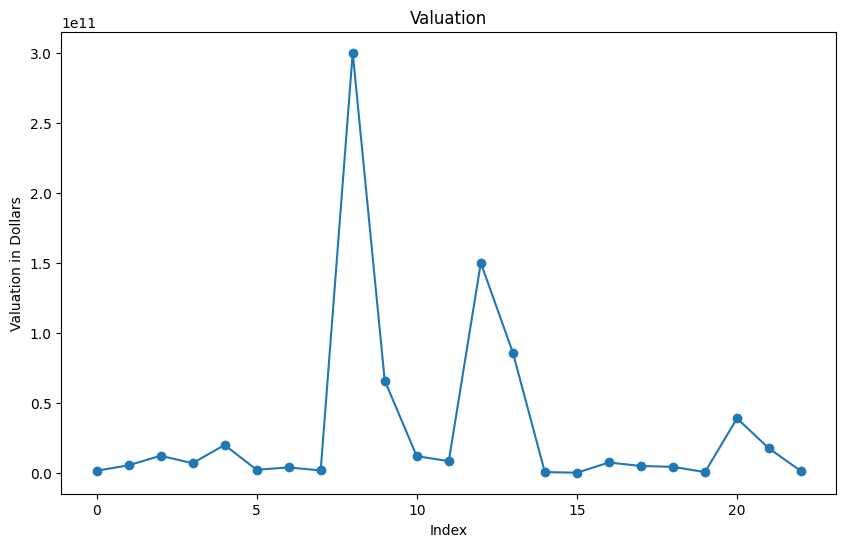

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Valuation'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Valuation in Dollars')
plt.title('Valuation')
plt.show()


In [30]:
revenue_df = filtered_df[filtered_df['Revenue'] > 9_060_000_000]
revenue_df

,ID,Name,CEO Name,Type,City,State,Country,Description,Valuation Date,Revenue Date,Growth Rate Date,Valuation,Revenue,Growth
8,YpAo3BEAACwA2Z6U,ByteDance,Liang Rubo,"[b2c, social media]",Beijing,None,CN,ByteDance is an internet technology business b...,2022-05-26,2023-05-26,2023-05-26,300000000000,108000000000,27.0
9,YtlCXxIAACwAuW1I,Shein,Chris Xu,"[ecommerce, b2c]",Singapore,CA,United States,Shein is a Chinese online fast-fashion ecommer...,2023-12-19,2023-12-19,2023-12-19,66000000000,33000000000,43.0
